In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
import librosa.display
from pathlib import Path

In [2]:
# ann_df = pd.read_csv('/mnt/d/DeepVoice/outputs/inference_results-EfficientNet2D_spec_256_10_sec.csv')
ann_df = pd.read_csv('/mnt/d/DeepVoice/outputs/inference_results-ResNet1Channel_spec_1000__4_sec.csv')
ann_df.head()

,Noise,ANT_BLUE,MAD_BLUE
0,0.962060,0.003902,0.034038
1,0.997676,0.001942,0.000381
2,0.000054,0.000225,0.999721
3,0.276413,0.034817,0.688769
4,0.987519,0.011591,0.000890


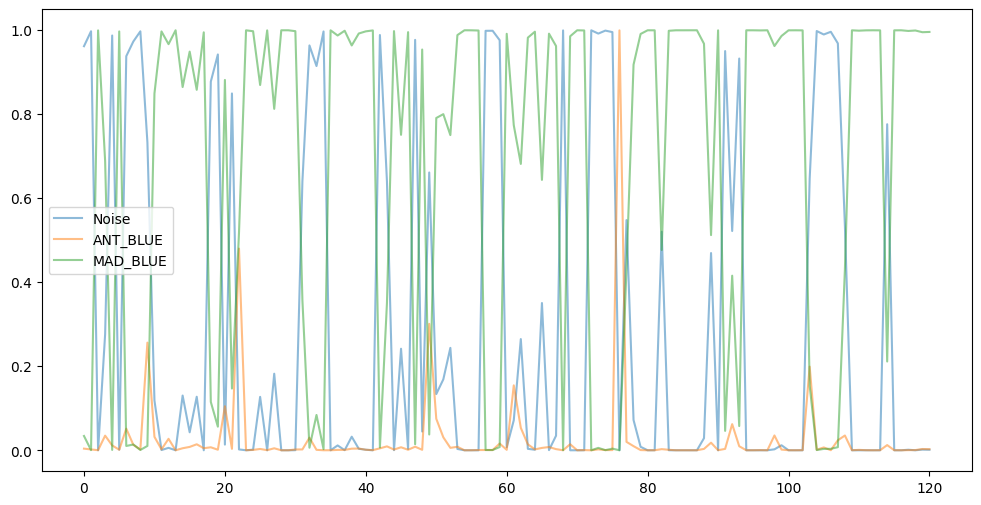

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(ann_df.Noise, alpha=0.5)
plt.plot(ann_df.ANT_BLUE, alpha=0.5)
plt.plot(ann_df.MAD_BLUE, alpha=0.5)
plt.legend(['Noise', 'ANT_BLUE', 'MAD_BLUE'])
plt.show()

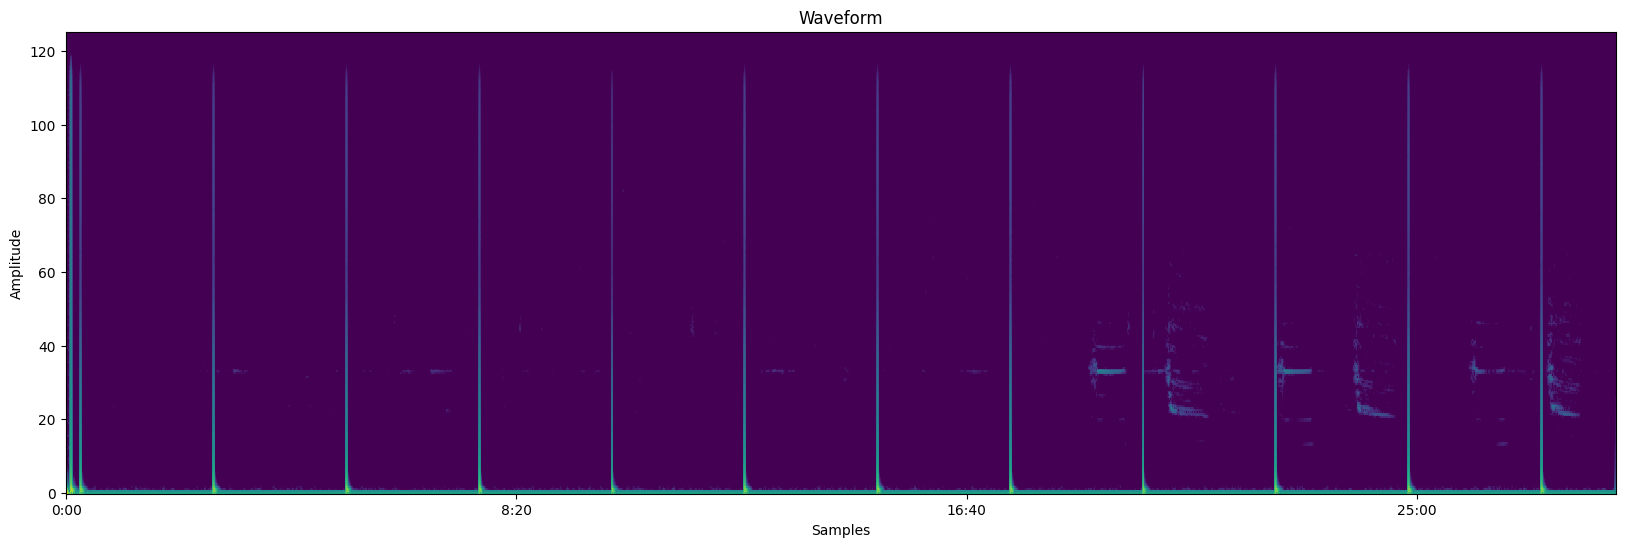

In [18]:
wav_file = Path('/mnt/d/DeepVoice/soundbay/datasets/temp_delete/5756.220318073455.wav')
y, sr = sf.read(wav_file)

# resample to 250 Hz for visualization
sr_resampled = 250
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=sr_resampled)



spec = librosa.stft(y_resampled, n_fft=int(sr_resampled * 2), hop_length=int(sr_resampled / 2), win_length=int(sr_resampled * 2))
spec_db = librosa.amplitude_to_db(np.abs(spec), ref=np.max)


plt.figure(figsize=(20, 6))
librosa.display.specshow(spec_db, sr=sr_resampled, hop_length=256, x_axis='time', y_axis='hz', cmap='viridis')
# plt.specgram(y_resampled, Fs=sr_resampled, NFFT=1024, noverlap=256, cmap='viridis')
plt.title('Waveform')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

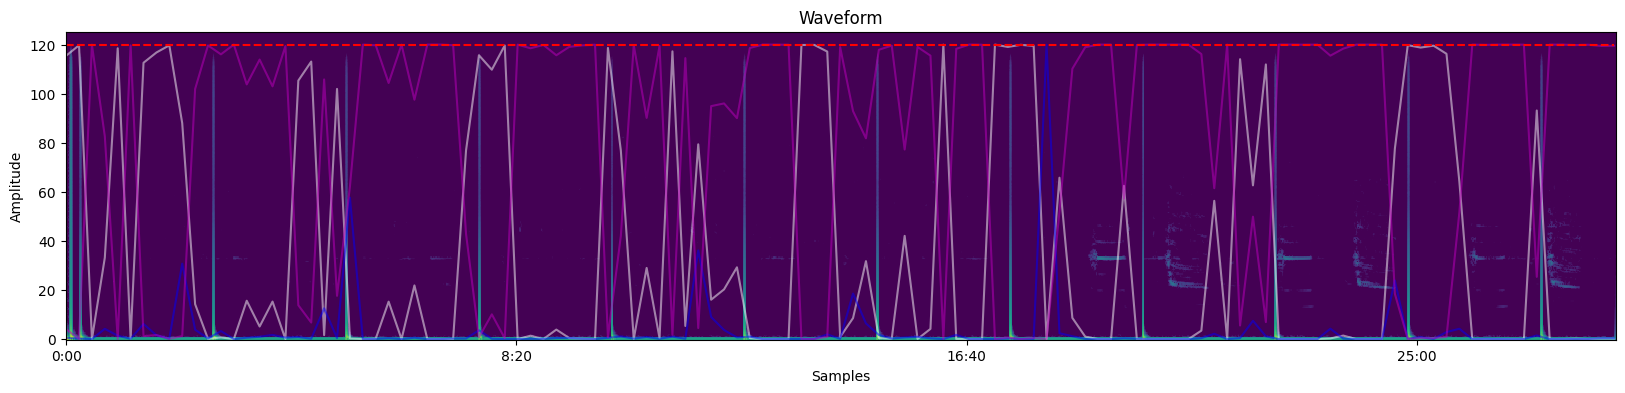

In [37]:
plt.figure(figsize=(20, 4))
librosa.display.specshow(spec_db, sr=sr_resampled, hop_length=256, x_axis='time', y_axis='hz', cmap='viridis')
# plt.specgram(y_resampled, Fs=sr_resampled, NFFT=1024, noverlap=256, cmap='viridis')
time = np.arange(len(ann_df.Noise.values)) * sr_resampled / 17.45
plt.plot(time, ann_df.Noise.values * 120, alpha=0.5, color='w', label='Noise')
plt.plot(time, ann_df.ANT_BLUE.values * 120, alpha=0.5, color='b', label='ANT_BLUE')
plt.plot(time, ann_df.MAD_BLUE.values * 120, alpha=0.5, color='m', label='MAD_BLUE')
plt.hlines(120, xmin=0, xmax=time[-1], colors='r', linestyles='dashed', label='Threshold')
# plt.legend(loc='upper right')
plt.title('Waveform')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

In [81]:
def convert_proba_to_int(proba_arr, threshold=0.95):
    int_arr = np.asarray(proba_arr)
    int_arr[int_arr <= threshold] = 0#np.nan
    int_arr[int_arr > threshold] = 1
    return int_arr


noise_arr = convert_proba_to_int(ann_df.Noise.values, threshold=0.98)
ant_blue_arr = convert_proba_to_int(ann_df.ANT_BLUE.values, threshold=0.98)
mad_blue_arr = convert_proba_to_int(ann_df.MAD_BLUE.values, threshold=0.98)
noise_arr

array([nan,  1., nan, nan,  1., nan, nan, nan,  1., nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan,
       nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan,  1.,  1., nan, nan, nan, nan, nan, nan,
       nan, nan, nan,  1., nan, nan, nan,  1.,  1.,  1.,  1., nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        1.,  1.,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan])

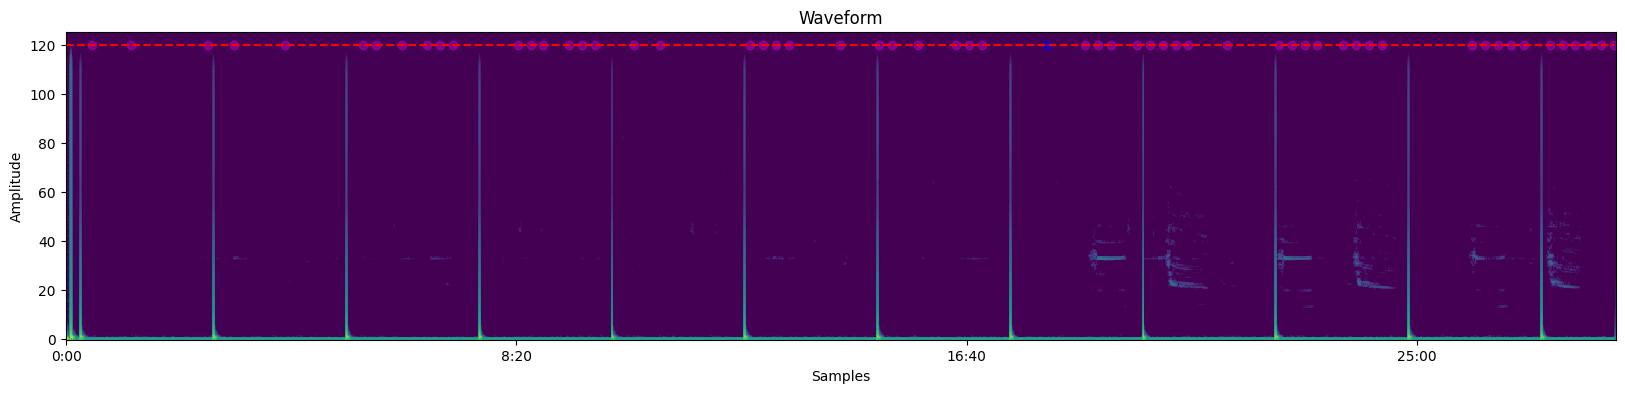

In [82]:
plt.figure(figsize=(20, 4))
librosa.display.specshow(spec_db, sr=sr_resampled, hop_length=256, x_axis='time', y_axis='hz', cmap='viridis')
# plt.specgram(y_resampled, Fs=sr_resampled, NFFT=1024, noverlap=256, cmap='viridis')
time = np.arange(len(ann_df.Noise.values)) * sr_resampled / 17.45
# plt.scatter(time, noise_arr * 120, alpha=0.5, color='w', label='Noise')
plt.scatter(time, ant_blue_arr* 120, alpha=0.5, color='b', label='ANT_BLUE')
plt.scatter(time, mad_blue_arr * 120, alpha=0.5, color='m', label='MAD_BLUE')
plt.hlines(120, xmin=0, xmax=time[-1], colors='r', linestyles='dashed', label='Threshold')
# plt.legend(loc='upper right')
plt.title('Waveform')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

In [71]:
ann_df.shape

121

121

In [70]:
len(y_resampled) / sr_resampled / 7

120.00171428571427

In [78]:
time

array([   0.        ,   14.32664756,   28.65329513,   42.97994269,
         57.30659026,   71.63323782,   85.95988539,  100.28653295,
        114.61318052,  128.93982808,  143.26647564,  157.59312321,
        171.91977077,  186.24641834,  200.5730659 ,  214.89971347,
        229.22636103,  243.5530086 ,  257.87965616,  272.20630372,
        286.53295129,  300.85959885,  315.18624642,  329.51289398,
        343.83954155,  358.16618911,  372.49283668,  386.81948424,
        401.14613181,  415.47277937,  429.79942693,  444.1260745 ,
        458.45272206,  472.77936963,  487.10601719,  501.43266476,
        515.75931232,  530.08595989,  544.41260745,  558.73925501,
        573.06590258,  587.39255014,  601.71919771,  616.04584527,
        630.37249284,  644.6991404 ,  659.02578797,  673.35243553,
        687.67908309,  702.00573066,  716.33237822,  730.65902579,
        744.98567335,  759.31232092,  773.63896848,  787.96561605,
        802.29226361,  816.61891117,  830.94555874,  845.27220

[28.4, 71.0, 156.2, 184.6, 241.39999999999998, 326.59999999999997, 369.2, 397.59999999999997, 497.0, 553.8, 624.8, 653.1999999999999, 752.5999999999999, 852.0, 894.5999999999999, 937.1999999999999, 979.8, 1121.8, 1178.6, 1278.0, 1334.8, 1405.8, 1547.8, 1633.0]


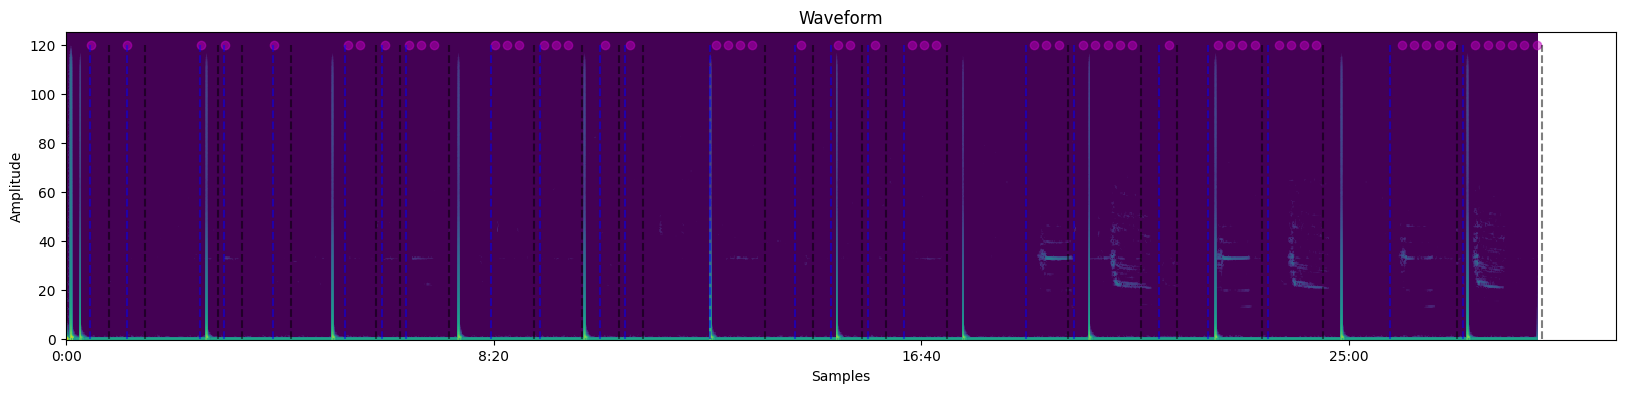

In [111]:
def return_start_end_call(detection_arr, time_interval, window_size_sec=4):
    starts, ends = [], []
    prev_val = 0
    for idx, val in enumerate(detection_arr):
        if val == 1 and prev_val != 1:
            starts.append(idx * time_interval)
        if val != 1 and prev_val == 1:
            ends.append(idx * time_interval + window_size_sec)
        prev_val = val
    if len(starts) > len(ends):
        ends.append(len(detection_arr) * time_interval + window_size_sec)
    return starts, ends


plt.figure(figsize=(20, 4))
librosa.display.specshow(spec_db, sr=sr_resampled, hop_length=256, x_axis='time', y_axis='hz', cmap='viridis')
# plt.specgram(y_resampled, Fs=sr_resampled, NFFT=1024, noverlap=256, cmap='viridis')
time = np.arange(len(ann_df.Noise.values)) * sr_resampled / 17.45
# plt.scatter(time, noise_arr * 120, alpha=0.5, color='w', label='Noise')

# ant blue starts and ends:
starts, ends = return_start_end_call(mad_blue_arr, time_interval=14.2, window_size_sec=7.2)
print(starts)
for s in starts:
    plt.vlines(s, ymin=0, ymax=120, colors='b', linestyles='dashed', alpha=0.5)
for e in ends:
    plt.vlines(e, ymin=0, ymax=120, colors='k', linestyles='dashed', alpha=0.5)


# plt.scatter(time, ant_blue_arr* 120, alpha=0.5, color='b', label='ANT_BLUE')
plt.scatter(time, mad_blue_arr * 120, alpha=0.5, color='m', label='MAD_BLUE')
# plt.hlines(120, xmin=0, xmax=time[-1], colors='r', linestyles='dashed', label='Threshold')
# plt.legend(loc='upper right')
plt.title('Waveform')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

In [112]:
starts[-1], ends[-1]

(1633.0, 1725.3999999999999)

In [114]:
y_resampled.shape[0] / sr_resampled

840.012

In [117]:
121 * 4

484